### SU(3) Wilson gauge theory phase prediction

In [1]:
from pathlib import Path

directory_path = Path('ML_plp')

data = [['beta','time','real','imag','norm','temp']]
# Iterate through files in the directory
for file_path in directory_path.iterdir():
    if file_path.is_file():
        beta = float(file_path.name[11:])
        temp = 0
        if beta>= 5.692:
            temp = 1
        with open(file_path, 'r') as file:
            lines = file.readlines()
            counter = 0
            for line in lines:
                if counter == 0:
                    if 'PLP_n_PLQ' in line:
                        real = float(line.split()[1])
                        imag = float(line.split()[2])
                        norm = (real**2 + imag**2)**0.5
                        counter = 1
                elif counter == 1:
                    if 'Time =' in line:
                        time = float(line.split()[2])
                        counter = 2
                    #print(beta,time,real,imag,norm,temp)
                if counter == 2:
                    data.append([beta,time,real,imag,norm,temp])
                    counter = 0

In [2]:
#convert your array into a dataframe
import pandas as pd
df = pd.DataFrame(data)
df.columns = ['beta','time','real','imag','norm','temp']
# convert rows to float
df = df[1:].astype(float)
df.head()

,beta,time,real,imag,norm,temp
1,5.6,1248.528000,0.025208,0.005945,0.025899,0.0
2,5.6,8.698424,0.029829,0.005234,0.030285,0.0
3,5.6,8.776138,0.003547,0.008195,0.008929,0.0
4,5.6,8.690735,0.005225,0.000432,0.005243,0.0
5,5.6,8.680194,0.004454,-0.005239,0.006876,0.0


In [3]:
# make seperate dataframes for based on beta value
df_beta = df.groupby('beta')
df_beta = {k: v for k, v in df_beta}
df_beta[5.6].tail()

,beta,time,real,imag,norm,temp
997,5.6,8.711810,0.003374,0.003862,0.005128,0.0
998,5.6,8.738259,0.014153,0.009100,0.016826,0.0
999,5.6,8.674391,0.011135,0.008454,0.013981,0.0
1000,5.6,8.720201,0.020020,0.010958,0.022823,0.0
1001,5.6,8.747325,0.018065,0.002749,0.018273,0.0


In [4]:
def autocorrelation_time(samples, Tcut):
    """
    Calculate the autocorrelation time of a sequence of samples.

    Args:
        samples (list): A list of samples from a Markov chain.
        Tcut (float): The cutoff time for the autocorrelation calculation.

    Returns:
        float: The autocorrelation time.
    """
    n = len(samples)
    mean = sum(samples) / n
    c0 = sum((x - mean) ** 2 for x in samples) / (n)

    # Calculate the autocovariance function
    # autocovariance = [0] * n
    # for t in range(n):
    #     autocovariance[t] = sum((samples[i] - mean) * (samples[i + t] - mean) for i in range(1,n - t)) / (n - t)
        
    def autocovariance(n,t): #c_t
        return sum((samples[i] - mean) * (samples[i + t] - mean) for i in range(1,n - t)) / (n - t)
        
    # Calculate the integrated autocorrelation time
    rho = []
    for t in range(1, Tcut):
        rho_t = autocovariance(n,t) / c0
        rho.append(rho_t)

    tau = 0.5 + sum(rho)
    return tau

In [5]:
# calculate autocorrelation time for each beta
# making seperate lists of norm for each beta
norm_list = []
for beta in df_beta:
    norm_list.append(df_beta[beta]['norm'].tolist())


In [6]:
real_list = []
for beta in df_beta:
    real_list.append(df_beta[beta]['real'].tolist())

imag_list = []
for beta in df_beta:
    imag_list.append(df_beta[beta]['imag'].tolist())

In [7]:
len(norm_list)

10

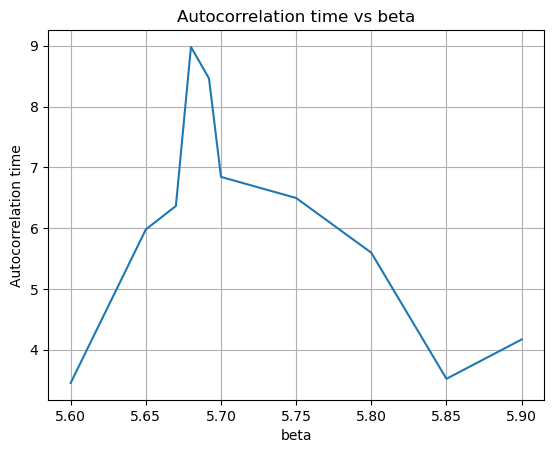

In [8]:
# calculate autocorrelation time for norms in each beta
autocorrelation_time_list = []
t_cut = 10
for norm in norm_list:
    autocorrelation_time_list.append(autocorrelation_time(norm, t_cut))
# plot autocorrelation time vs beta
import matplotlib.pyplot as plt
plt.plot(df_beta.keys(),autocorrelation_time_list)
plt.xlabel('beta')
plt.ylabel('Autocorrelation time')
plt.title('Autocorrelation time vs beta')
plt.grid()
plt.show()


In [9]:
list(df_beta.keys())

[5.6, 5.65, 5.67, 5.68, 5.692, 5.7, 5.75, 5.8, 5.85, 5.9]

In [10]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pyerrors as pe
#plt.style.use('./base_style.mplstyle')
import shutil
usetex = shutil.which('latex') not in ('', None)
plt.rc('text', usetex=usetex)


Type:        module
String form: <module 'pyerrors' from 'c:\\Users\\Lumin\\anaconda3\\envs\\pycaret\\lib\\site-packages\\pyerrors\\__init__.py'>
File:        c:\users\lumin\anaconda3\envs\pycaret\lib\site-packages\pyerrors\__init__.py
Source:     
r'''
# What is pyerrors?
`pyerrors` is a python package for error computation and propagation of Markov chain Monte Carlo data.
It is based on the gamma method [arXiv:hep-lat/0306017](https://arxiv.org/abs/hep-lat/0306017). Some of its features are:
- automatic differentiation for exact linear error propagation as suggested in [arXiv:1809.01289](https://arxiv.org/abs/1809.01289) (partly based on the [autograd](https://github.com/HIPS/autograd) package).
- treatment of slow modes in the simulation as suggested in [arXiv:1009.5228](https://arxiv.org/abs/1009.5228).
- coherent error propagation for data from different Markov chains.
- non-linear fits with x- and y-errors and exact linear error propagation based on automatic differentiation as i
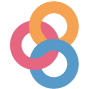

In [11]:
pe??

$$\tau_\mathrm{int}=\frac{1}{2}+\sum_{t=1}^{W}\rho(t)\geq \frac{1}{2}\,.$$

The integrated autocorrelation time $\tau_\mathrm{int}$ and the autocorrelation function $\rho(W)$ can be monitored via the methods `pyerrors.obs.Obs.plot_tauint` and `pyerrors.obs.Obs.plot_rho`.

In [12]:
sample = pe.Obs(norm_list, [str(i) for i in list(df_beta.keys())])

In [13]:
sample.gamma_method(S = 1)
print(sample)

0.335(23)


In [14]:
sample.details()

Result	 3.35304578e-01 +/- 2.29216633e-02 +/- 6.29681097e-03 (6.836%)
 Ensemble errors:
 5.6 	 8.298439e-04 +/- 9.987652e-05
 τ_int	 4.06(81) in units of 1 config        	(S=1.00)
 5.65 	 2.230975e-03 +/- 4.081314e-04
 τ_int	 12.9(3.5) in units of 1 config       	(S=1.00)
 5.67 	 2.408990e-03 +/- 4.963779e-04
 τ_int	 17.8(5.3) in units of 1 config       	(S=1.00)
 5.68 	 2.026956e-02 +/- 7.061801e-03
 τ_int	 109(32) in units of 1 config         	(S=1.00)
 5.692 	 8.276639e-03 +/- 2.180868e-03
 τ_int	 38(13) in units of 1 config          	(S=1.00)
 5.7 	 3.418989e-03 +/- 6.617536e-04
 τ_int	 15.2(4.3) in units of 1 config       	(S=1.00)
 5.75 	 3.735866e-03 +/- 8.051943e-04
 τ_int	 20.6(6.3) in units of 1 config       	(S=1.00)
 5.8 	 2.308340e-03 +/- 3.894980e-04
 τ_int	 10.4(2.7) in units of 1 config       	(S=1.00)
 5.85 	 1.192982e-03 +/- 1.435823e-04
 τ_int	 4.09(82) in units of 1 config        	(S=1.00)
 5.9 	 1.475720e-03 +/- 2.006193e-04
 τ_int	 5.9(1.3) in units of 1 config   

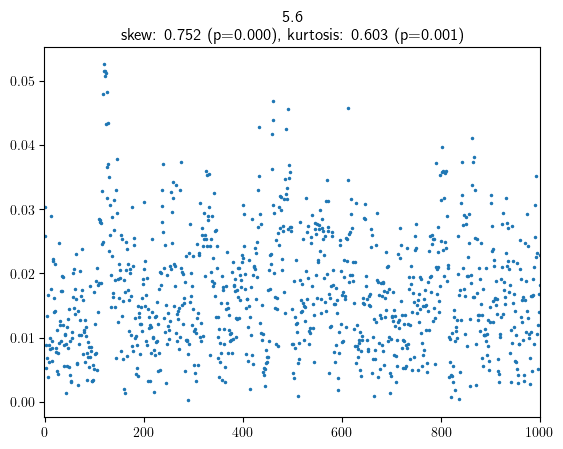

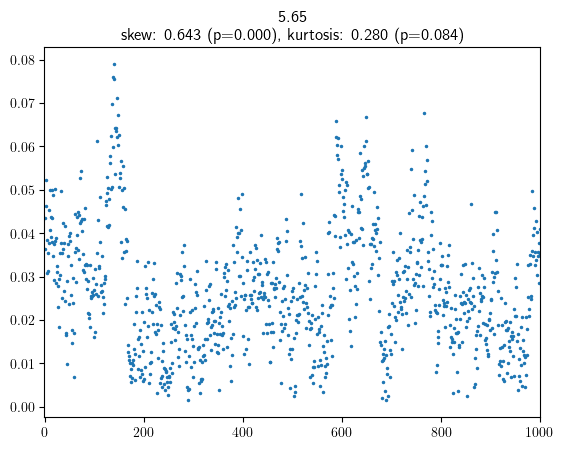

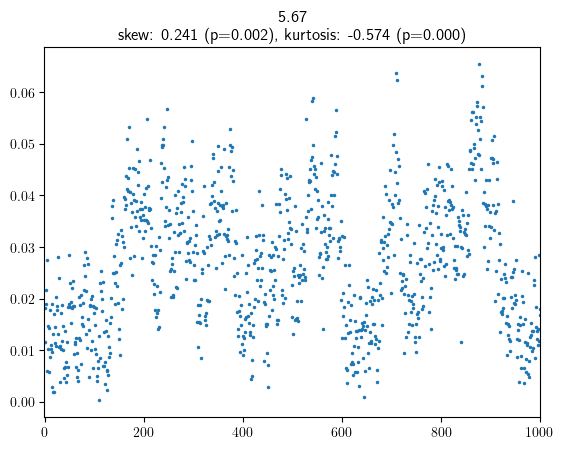

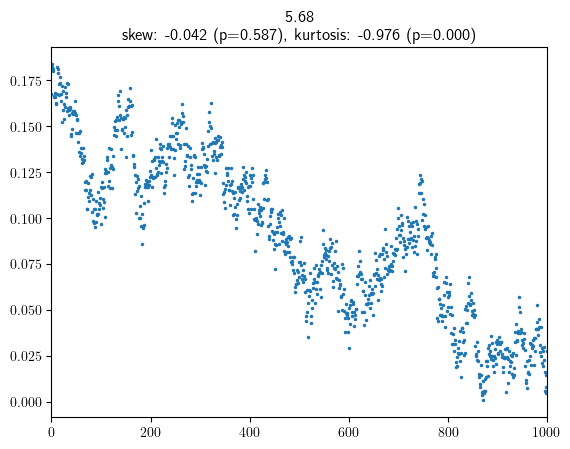

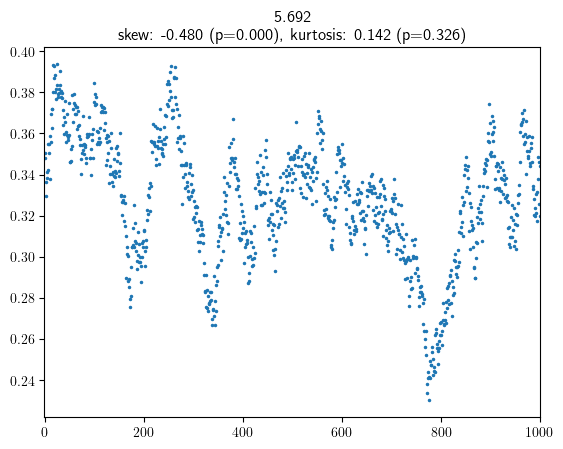

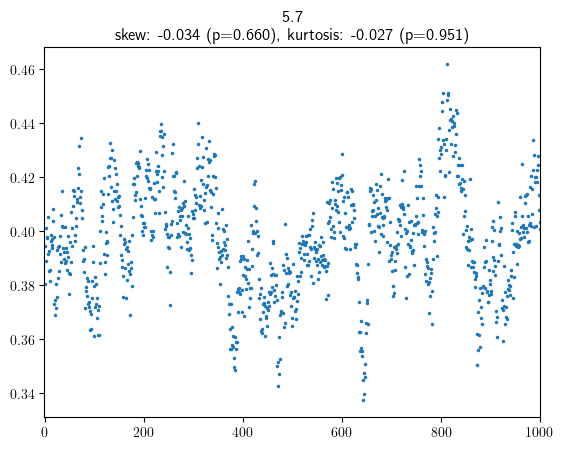

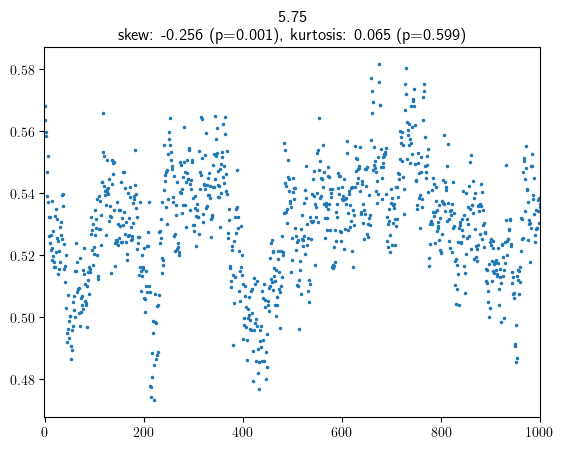

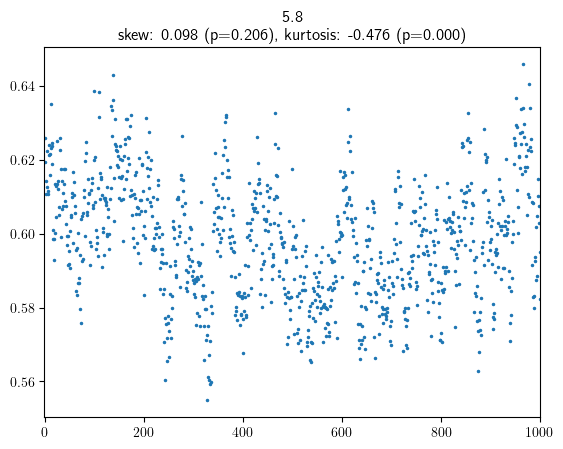

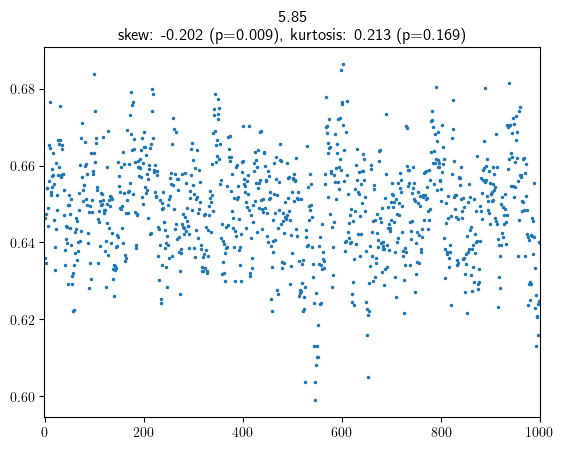

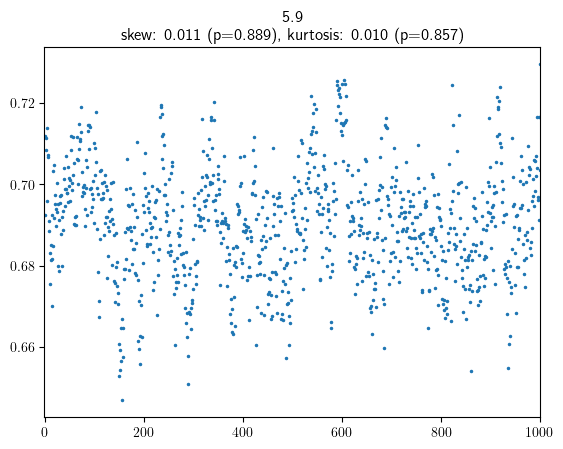

In [15]:
sample.plot_history()

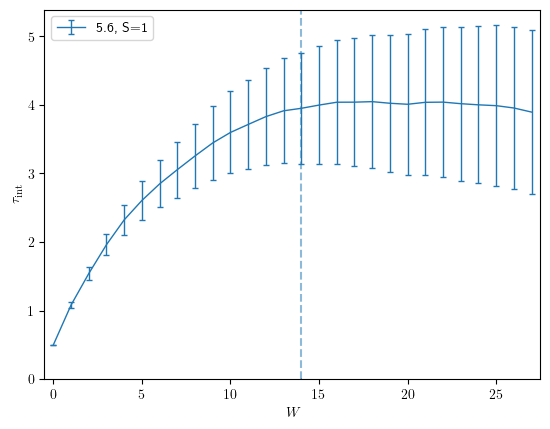

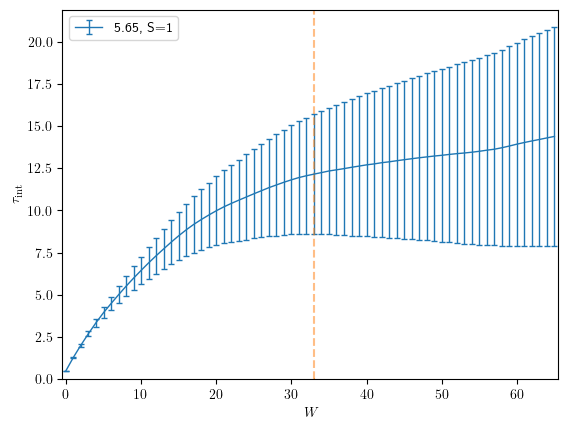

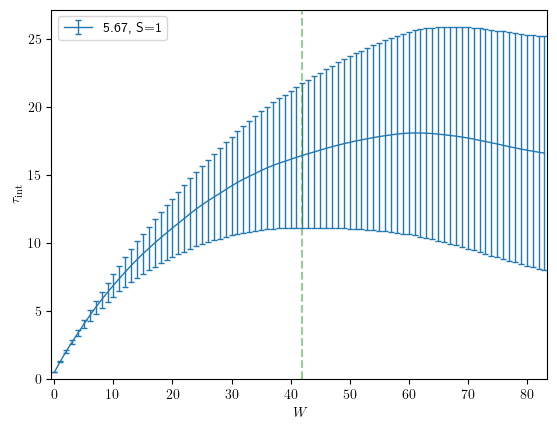

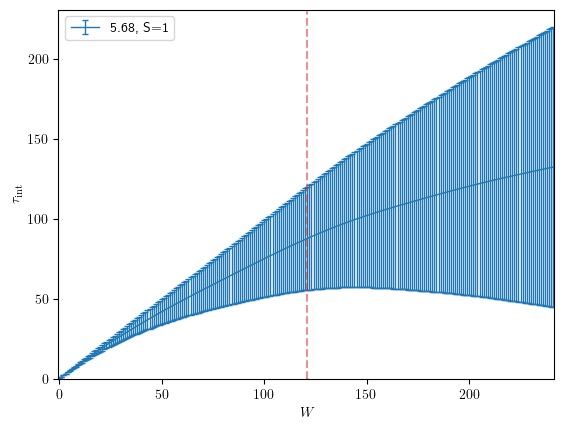

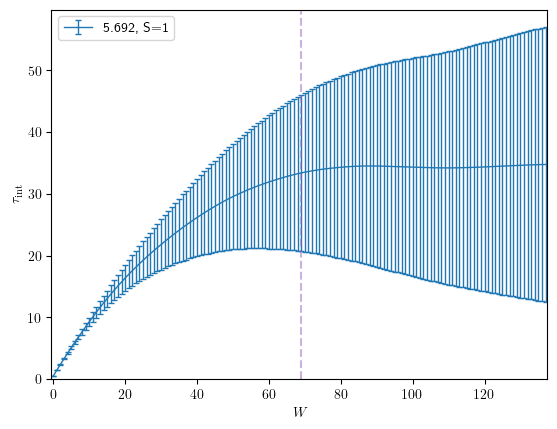

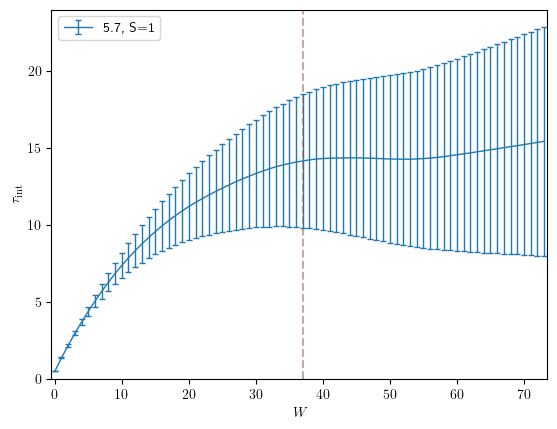

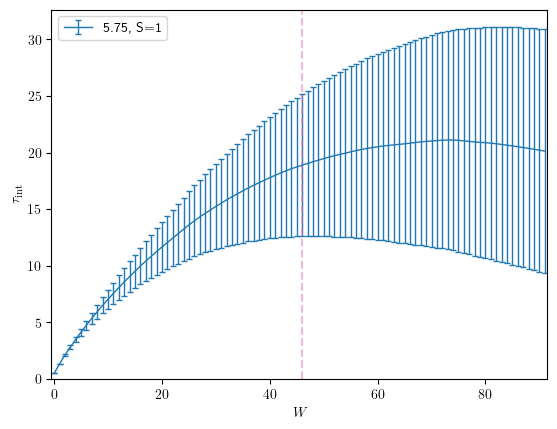

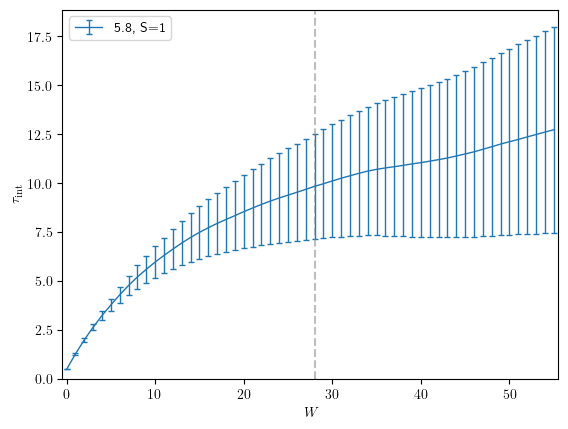

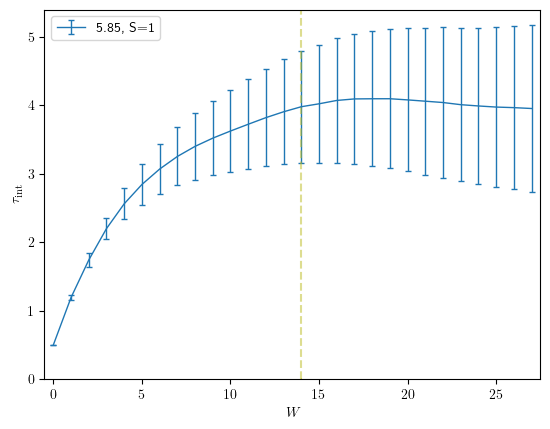

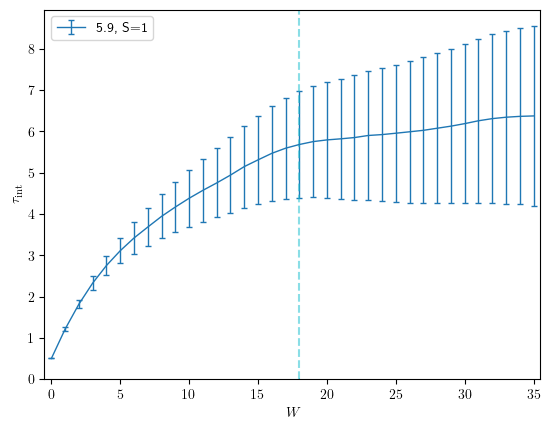

In [16]:
sample.plot_tauint()

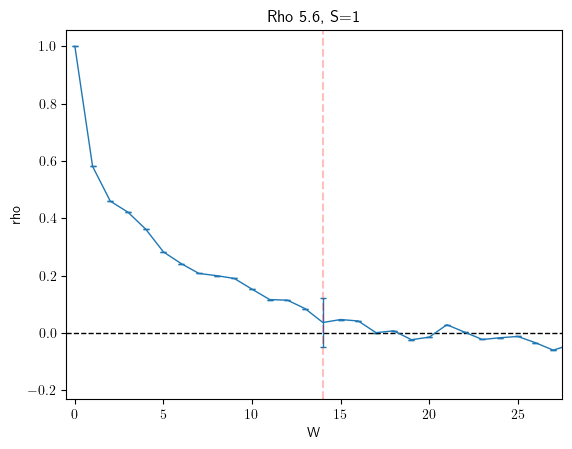

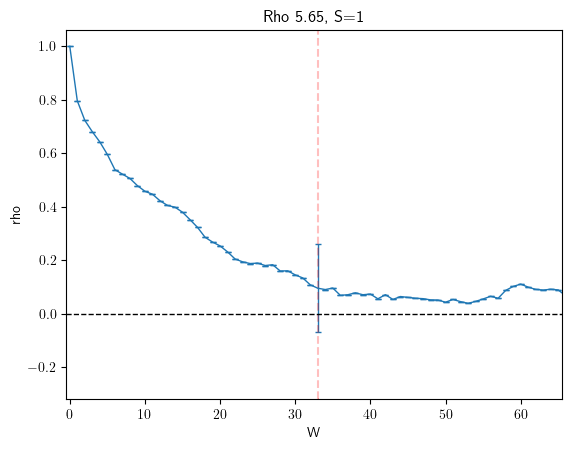

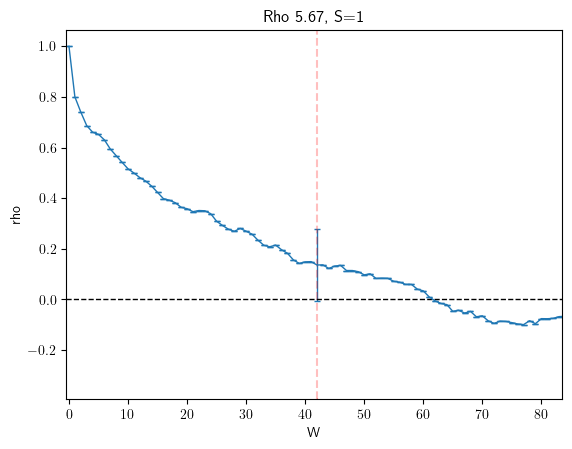

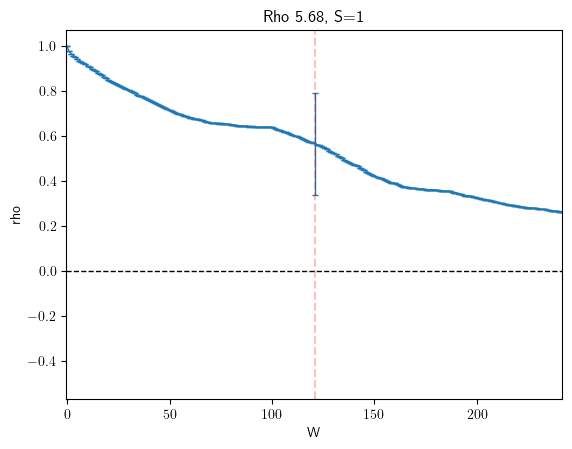

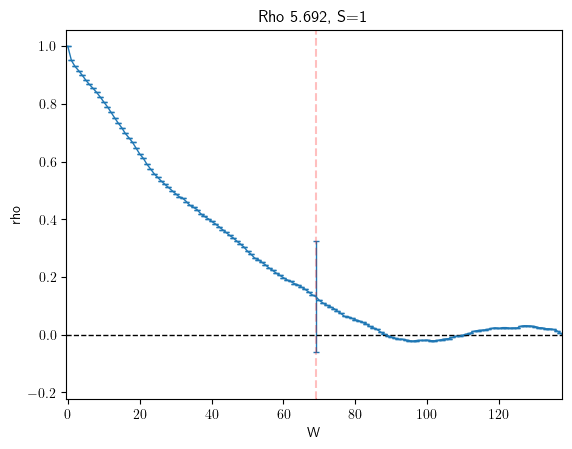

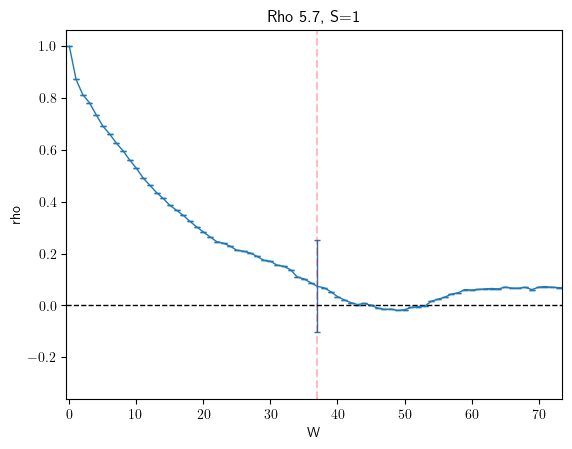

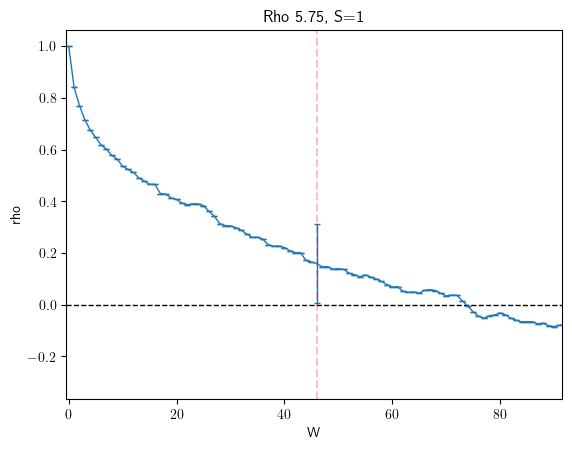

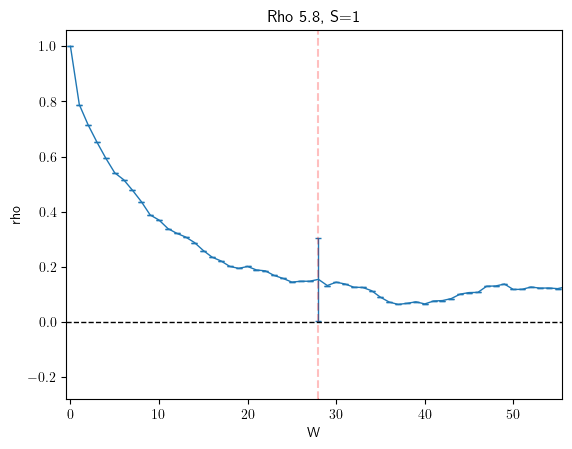

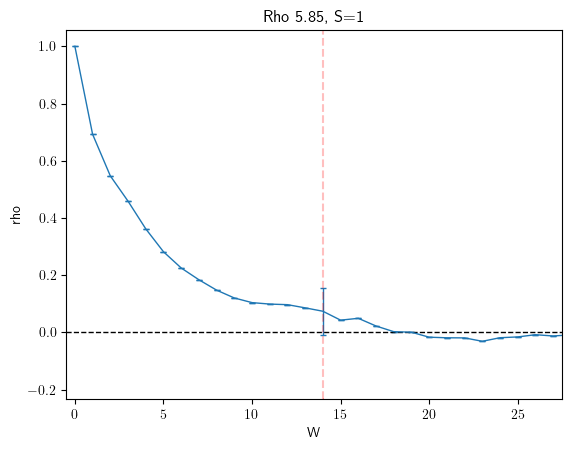

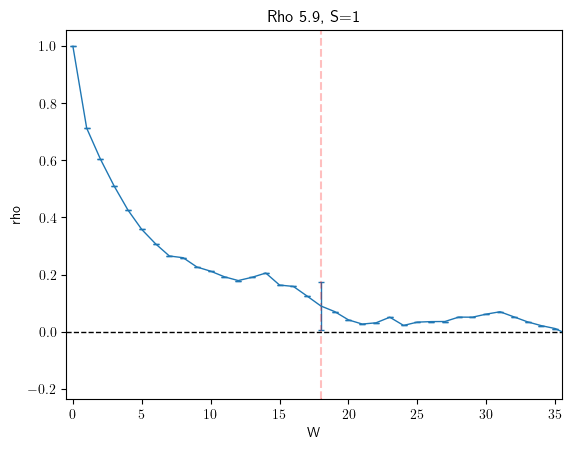

In [17]:
sample.plot_rho()

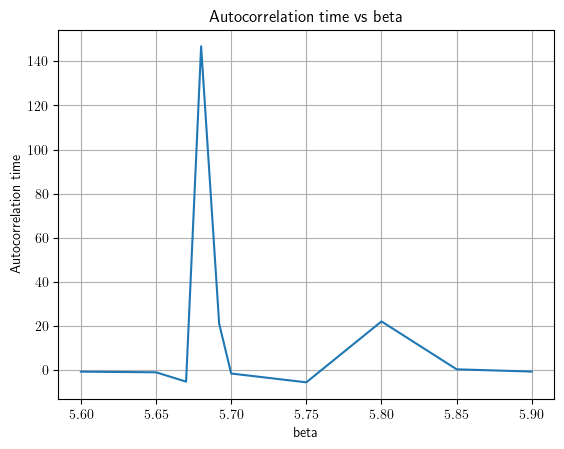

In [18]:
autocorrelation_time_list = []
t_cut = 300
for norm in norm_list:
    autocorrelation_time_list.append(autocorrelation_time(norm, t_cut))
# plot autocorrelation time vs beta
import matplotlib.pyplot as plt
plt.plot(df_beta.keys(),autocorrelation_time_list)
plt.xlabel('beta')
plt.ylabel('Autocorrelation time')
plt.title('Autocorrelation time vs beta')
plt.grid()
plt.show()

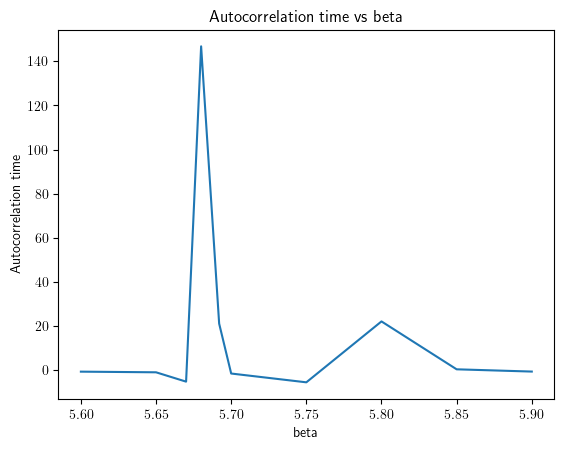

In [19]:
# plot autocorrelation time vs beta
import matplotlib.pyplot as plt
plt.plot(df_beta.keys(),autocorrelation_time_list)
plt.xlabel('beta')
plt.ylabel('Autocorrelation time')
plt.title('Autocorrelation time vs beta')
plt.show()

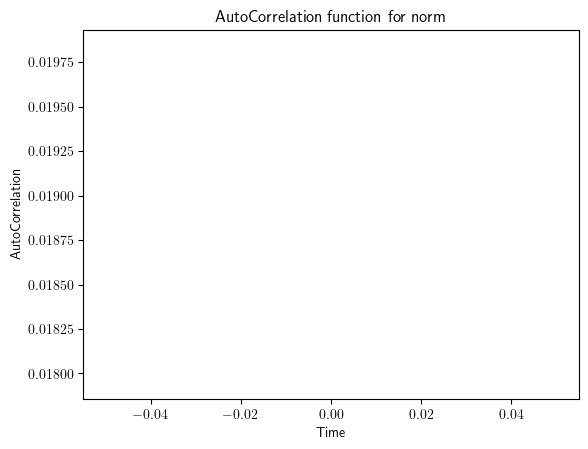

[3099.65044046   +0.j          730.35881168-1746.22303573j
   70.73218873 -775.44002414j ...   29.3716142  +539.36849333j
   70.73218873 +775.44002414j  730.35881168+1746.22303573j]


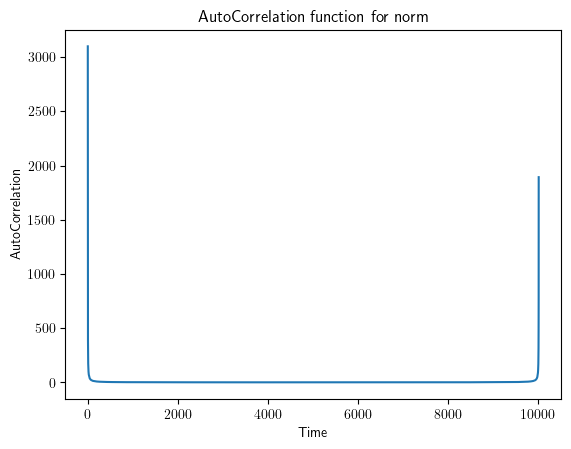

In [20]:
# now finding and plotting the AutoCorrelation function for the norm using Window method
import numpy as np
import matplotlib.pyplot as plt

def autocorr(x):
    result = np.correlate(x, x, mode='full')
    return result[result.size // 2:]

def window_autocorr(x, window_size):
    autocorr_values = autocorr(x)
    return autocorr_values[len(x)-1:len(x)+window_size]

window_size = 100
autocorr_values = window_autocorr(df['norm'], window_size)
plt.plot(autocorr_values)
plt.title('AutoCorrelation function for norm')
plt.xlabel('Time')
plt.ylabel('AutoCorrelation')
plt.show()

# now finding and plotting the AutoCorrelation function for the norm using FFT method
def autocorr_fft(x):
    result = np.correlate(x, x, mode='full')
    result = result[result.size // 2:]
    result = result / result[0]
    return np.fft.fft(result)

autocorr_values = autocorr_fft(df['norm'])
print(autocorr_values)
plt.plot(np.abs(autocorr_values))
plt.title('AutoCorrelation function for norm')
plt.xlabel('Time')
plt.ylabel('AutoCorrelation')
plt.show()



In [21]:
from pycaret.classification import *

In [22]:
experiment = setup(data = df,  target = 'temp', train_size= 0.6, ignore_features=['beta','real','imag'], session_id=123)

,Description,Value
0,Session id,123
1,Target,temp
2,Target type,Binary
3,Original data shape,"(10010, 6)"
4,Transformed data shape,"(10010, 3)"
5,Transformed train set shape,"(6006, 3)"
6,Transformed test set shape,"(4004, 3)"
7,Ignore features,3
8,Numeric features,2
9,Preprocess,True


In [23]:
best_model = compare_models()

In [24]:
lr = create_model('lr')
evaluate_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

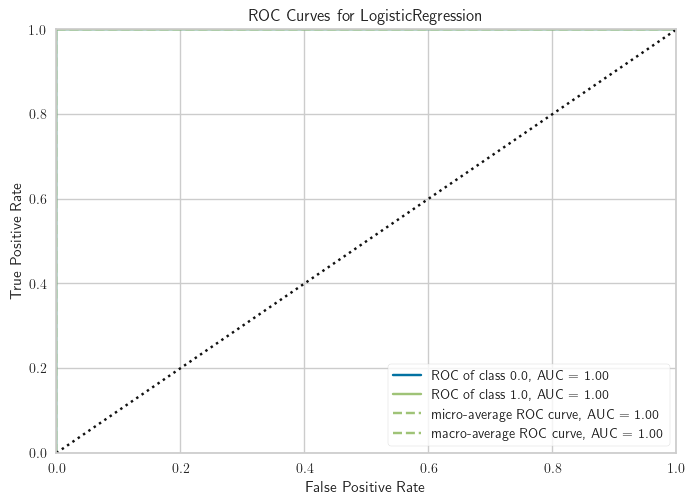

In [25]:
plot_model(lr, plot = 'auc')

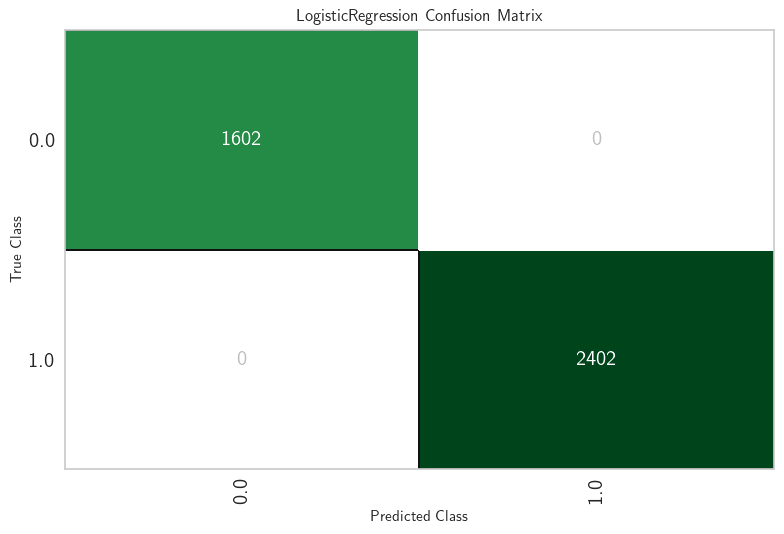

In [26]:
plot_model(lr, plot = 'confusion_matrix')

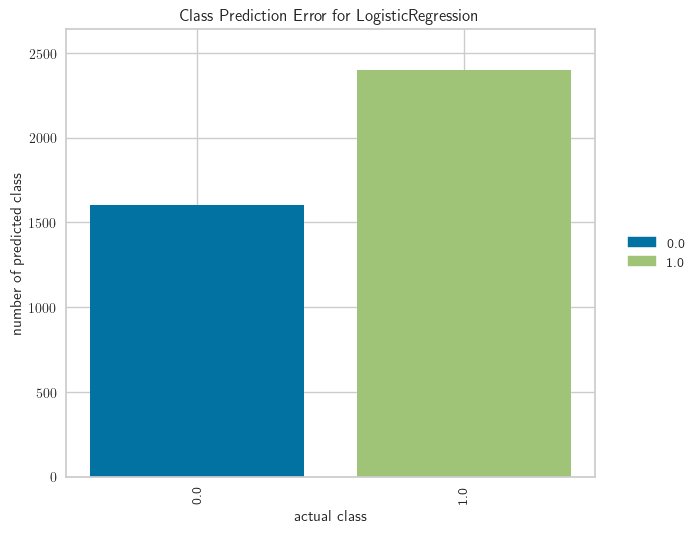

In [27]:
plot_model(lr, plot = 'error')

In [28]:
pred_holdout = predict_model(lr)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [29]:
pred_holdout

,time,norm,temp,prediction_label,prediction_score
1555,8.667276,0.017228,0.0,0,0.9846
1881,8.659210,0.026145,0.0,0,0.9816
2621,8.671584,0.018763,0.0,0,0.9842
7801,8.658364,0.597664,1.0,1,0.9996
106,8.682326,0.004997,0.0,0,0.9880
...,...,...,...,...,...
8291,8.657811,0.642227,1.0,1,0.9998
9957,8.705272,0.695244,1.0,1,0.9999
5917,8.698111,0.370510,1.0,1,0.9573
4584,8.676229,0.304694,1.0,1,0.8525


In [30]:
# copy data and drop Class variable

new_data = df.copy()
new_data.drop('temp', axis=1, inplace=True)
new_data.head()

,beta,time,real,imag,norm
1,5.6,1248.528000,0.025208,0.005945,0.025899
2,5.6,8.698424,0.029829,0.005234,0.030285
3,5.6,8.776138,0.003547,0.008195,0.008929
4,5.6,8.690735,0.005225,0.000432,0.005243
5,5.6,8.680194,0.004454,-0.005239,0.006876


In [31]:
# predict model on new_data
predictions = predict_model(lr, data = new_data)
predictions.head()

,beta,time,real,imag,norm,prediction_label,prediction_score
1,5.6,1248.527954,0.025208,0.005945,0.025899,0,0.9806
2,5.6,8.698424,0.029829,0.005234,0.030285,0,0.9800
3,5.6,8.776138,0.003547,0.008195,0.008929,0,0.9870
4,5.6,8.690735,0.005225,0.000432,0.005243,0,0.9880
5,5.6,8.680194,0.004454,-0.005239,0.006876,0,0.9875


Text(0, 0.5, 'predicted phase')

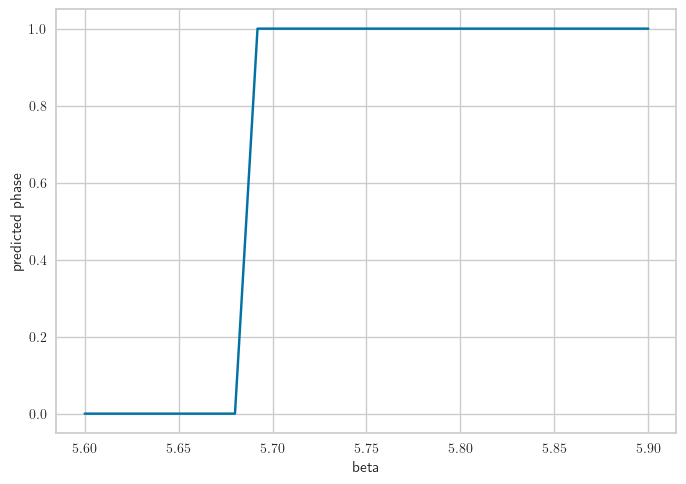

In [32]:
import matplotlib.pyplot as plt
plt.plot(predictions['beta'], predictions['prediction_label'])
plt.xlabel('beta')
plt.ylabel('predicted phase')

### Ising Model